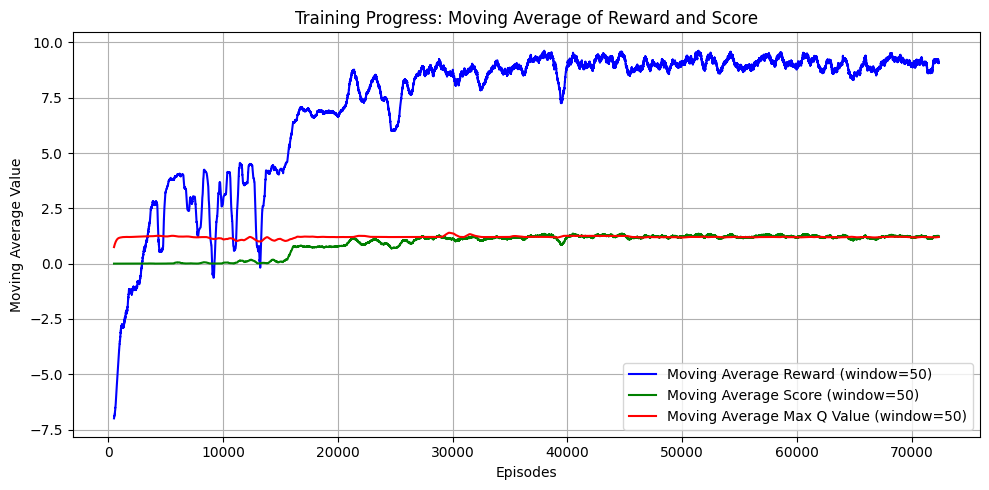

In [586]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the training log with optimizations
log_file = "./training_log_base_Q.txt"
data = pd.read_csv(
    log_file,
    usecols=["Episode", "Reward", "Score", 'Max Q Value'],
    engine='pyarrow'
)

# Define the window size
window_size = 500

# Calculate moving averages
moving_avg_rewards = data["Reward"].rolling(window=window_size).mean()
moving_avg_scores = data["Score"].rolling(window=window_size).mean()
moving_avg_max_q = data["Max Q Value"].rolling(window=window_size).mean()


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data["Episode"], moving_avg_rewards, label='Moving Average Reward (window=50)', color='blue')
plt.plot(data["Episode"], moving_avg_scores, label='Moving Average Score (window=50)', color='green')
plt.plot(data["Episode"], moving_avg_max_q, label='Moving Average Max Q Value (window=50)', color='red')
plt.title("Training Progress: Moving Average of Reward and Score")
plt.xlabel("Episodes")
plt.ylabel("Moving Average Value")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


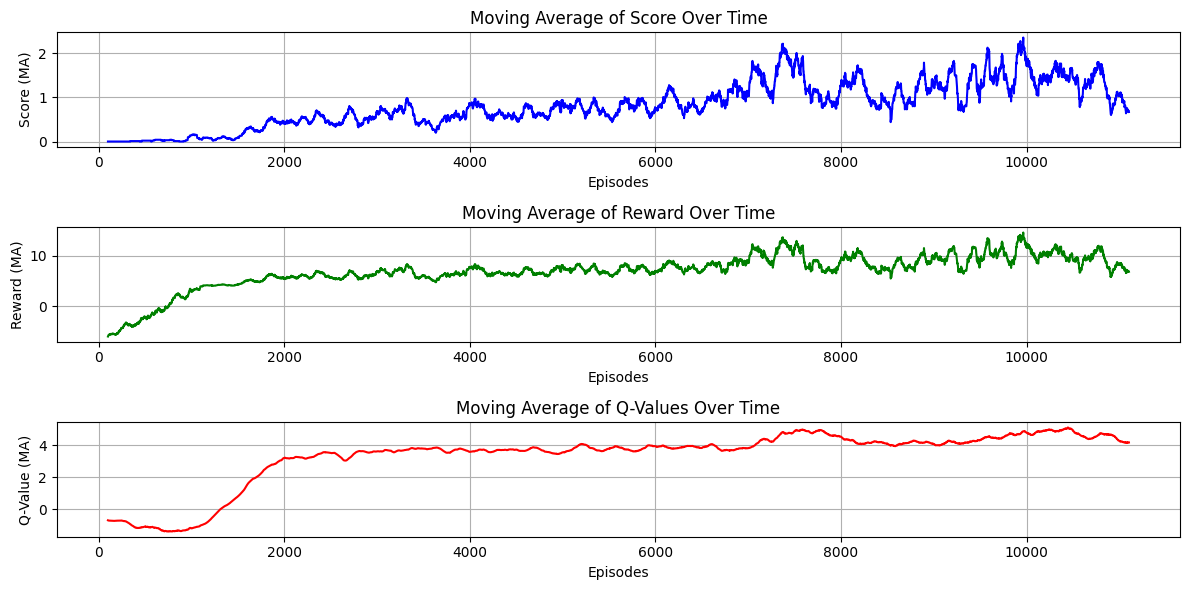

In [587]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the training log into a DataFrame
data = []
with open("training_log.txt", "r") as file:
    for line in file:
        parts = line.strip().split(", ")
        if len(parts) >= 4:
            run = int(parts[0].split(": ")[1])
            exploration = float(parts[1].split(": ")[1])
            score = int(parts[2].split(": ")[1])
            q_value = float(parts[3].split(": ")[1])
            reward = float(parts[4].split(": ")[1])
            data.append([run, exploration, score, q_value, reward])

df = pd.DataFrame(data, columns=["Run", "Exploration", "Score", "Q_value", "Reward"])

# Calculate the moving average (window size = 100 runs)
window_size = 100
df["Score_MA"] = df["Score"].rolling(window=window_size).mean()
df["Reward_MA"] = df["Reward"].rolling(window=window_size).mean()
df["Q_Value_MA"] = df["Q_value"].rolling(window=window_size).mean()

# Plot the moving averages
plt.figure(figsize=(12, 6))

# Subplot 1: Score
plt.subplot(3, 1, 1)
plt.plot(df["Run"], df["Score_MA"], label="Moving Average Score", color="blue")
plt.xlabel("Episodes")
plt.ylabel("Score (MA)")
plt.title("Moving Average of Score Over Time")
plt.grid(True)

# Subplot 2: Reward
plt.subplot(3, 1, 2)
plt.plot(df["Run"], df["Reward_MA"], label="Moving Average Reward", color="green")
plt.xlabel("Episodes")
plt.ylabel("Reward (MA)")
plt.title("Moving Average of Reward Over Time")
plt.grid(True)

# Subplot 3: Q-value
plt.subplot(3, 1, 3)
plt.plot(df["Run"], df["Q_Value_MA"], label="Moving Average Q-Value", color="red")
plt.xlabel("Episodes")
plt.ylabel("Q-Value (MA)")
plt.title("Moving Average of Q-Values Over Time")
plt.grid(True)

plt.tight_layout()  # Adjust subplots to fit better
plt.show()
